In [17]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
file_name = "artworks.csv"
df = pd.read_csv(file_name, header=0)
df = df.fillna('')
df = df.replace(to_replace=('\(', '\)','0','0 0'), value="", regex=True)
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria Elev...",Otto Wagner,621,"Austrian, 1841–1918",Austrian,1841,1918,Male,1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1IlsW...,,,,48.6000,,,168.9000,,
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,747,"French, born 1944",French,1944,,Male,1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3IlsWyJwI...,,,,40.6401,,,29.8451,,
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,765,"Austrian, 1876–1957",Austrian,1876,1957,Male,193,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4IlsWyJwI...,,,,34.3000,,,31.8000,,
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,756,"French and Swiss, born Switzerland 1944",,1944,,Male,198,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,,,,50.8000,,,50.8000,,
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,765,"Austrian, 1876–1957",Austrian,1876,1957,Male,193,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,,,,38.4000,,,19.1000,,


In [19]:
df.shape

(138151, 29)

In [12]:
#explore random artworks
import random
r = random.randint(0, 138150)
df.loc[r]

Title                       The Brown Sisters, Wellfleet, Massachusetts
Artist                                                   Nicholas Nixon
ConstituentID                                                      4315
ArtistBio                                           American, born 1947
Nationality                                                    American
BeginDate                                                          1947
EndDate                                                                
Gender                                                             Male
Date                                                                214
Medium                                             Gelatin silver print
Dimensions                              7 11/16 × 9 5/8" 19.5 × 24.4 cm
CreditLine                             Cornelius N. Bliss Memorial Fund
AccessionNumber                                                 962.214
Classification                                               Pho

In [13]:
#genderBalance
genderBalance = df["Gender"].value_counts(normalize=True)
type(genderBalance)
#genderBalance to df
#make graph
print(genderBalance.to_string())

Male                                                                                                                                                                                                                                                                        0.753813
Female                                                                                                                                                                                                                                                                      0.128997
                                                                                                                                                                                                                                                                            0.062548
Male Male                                                                                                                                                                

In [17]:
1-(0.753813 + 0.128997)

0.11719000000000002

In [14]:
dfcopy = df[df[['Date']].apply(lambda x: x[0].isdigit(), axis=1)]
#dfcopy['Date'] = dfcopy['Date'].astype(int)
dfcopy.sort_values(by=['Date'])
#make a sorted series
creation = dfcopy["Date"].value_counts(normalize=True)
print(creation.to_string())

1967    0.020910
1966    0.020295
1971    0.019789
197     0.018861
1968    0.018786
1965    0.018085
1973    0.016650
1969    0.016467
21      0.016392
1964    0.015648
198     0.015367
23      0.015205
1962    0.014968
193     0.014753
1963    0.014052
1991    0.013361
1972    0.012887
199     0.012747
1928    0.012207
196     0.011895
1976    0.011733
1931    0.011636
22      0.011593
1961    0.011377
1974    0.011032
192     0.010741
195     0.010331
1977    0.010277
1984    0.010245
24      0.009975
1983    0.009652
1959    0.009555
1978    0.009522
1999    0.009511
1994    0.009501
1975    0.009382
1998    0.009350
1988    0.009242
1979    0.009220
25      0.008843
1958    0.008811
1957    0.008789
1934    0.008670
1925    0.008670
1989    0.008562
1948    0.008541
1913    0.008433
1987    0.008433
1986    0.008422
1995    0.008379
2       0.008314
1981    0.008282
1929    0.008271
1982    0.008185
1924    0.008077
1926    0.008034
1985    0.008002
27      0.007991
191     0.0079

In [20]:
originBalance = df["Nationality"].value_counts(normalize=True)
print(originBalance.to_string())

American                                                                                                                                                                                                                                                                                                                                                                                                                                  0.412324
French                                                                                                                                                                                                                                                                                                                                                                                                                                    0.163509
German                                                                                                                            

In [19]:
type(creation)

pandas.core.series.Series

In [49]:
dfCreated = pd.DataFrame({'year':creation.index, 'percentage':creation.values})
dfCreated['year']= dfCreated['year'].astype(str)
dfCreated.head()

,year,percentage
0,1967,0.020910
1,1966,0.020295
2,1971,0.019789
3,197,0.018861
4,1968,0.018786


In [64]:
mean = dfCreated[:20].percentage.mean()

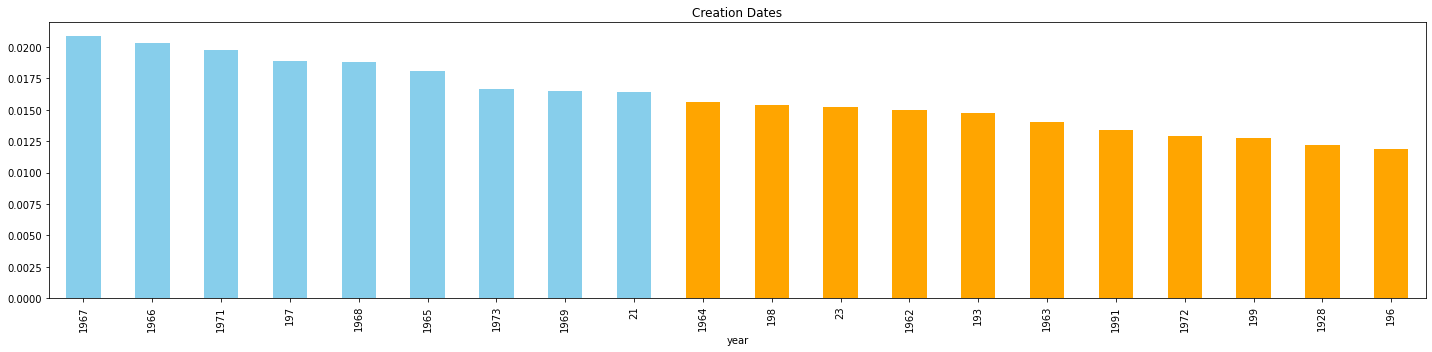

In [65]:
fig, ax = plt.subplots(figsize=(20, 5))
#plot only top 20
dfCreated[:20].plot.bar(x='year',
                      y='percentage',
                      ax=ax,
                      color=np.where(dfCreated['percentage'] < mean, 'orange', 'skyblue'))
ax.set_title("Creation Dates")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig('CreationDates.png', dpi=1000)
plt.show()